# Fashion MNIST

In [1]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

random_seed = 20181401
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed)

display = display if "display" in vars(__builtins__) else print
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
display(device)

device(type='cuda', index=0)

In [2]:
learning_rate = 0.00001
training_epochs = 32
batch_size = 32

In [3]:
label_map = ["티셔츠/상의", "바지", "스웨터", "드레스", "코트", "샌들", "셔츠", "운동화", "가방", "부츠"]
fashion_mnist_train_dataset = datasets.FashionMNIST(root="datasets/", train=True, transform=transforms.ToTensor(), download=True)
fashion_mnist_test_dataset = datasets.FashionMNIST(root="datasets/", train=False, transform=transforms.ToTensor(), download=True)
fashion_mnist_train_loader = DataLoader(fashion_mnist_train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
fashion_mnist_test_loader = DataLoader(fashion_mnist_test_dataset, batch_size=batch_size, drop_last=True)

In [4]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(
      nn.Conv2d(1, 120, kernel_size=5, stride=1, padding=2),
      nn.BatchNorm2d(120),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )
    self.layer2 = nn.Sequential(
      nn.Conv2d(120, 320, kernel_size=5, stride=1),
      nn.BatchNorm2d(320),
      nn.ReLU(),
      nn.MaxPool2d(2)
    )
    self.layer3 = nn.Sequential(
      nn.Conv2d(320, 640, kernel_size=5, stride=1),
      nn.BatchNorm2d(640),
      nn.ReLU()
    )
    self.layer4 = nn.Sequential(
      nn.Linear(640, 384),
      nn.BatchNorm1d(384),
      nn.ReLU(),
      nn.Dropout(0.5),
      nn.Linear(384, 10)
    )
  
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.view(out.shape[0], -1)
    out = self.layer4(out)
    return out

In [5]:
model = Model().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
def calculate_accuracy():
  with torch.no_grad():
    model.eval()
    accuracy = 0

    for x, y in fashion_mnist_test_loader:
      assert isinstance(x, torch.Tensor)
      assert isinstance(y, torch.Tensor)
      x = x.to(device)
      y = y.to(device)

      hypothesis = model(x)
      prediction = torch.argmax(hypothesis, dim=1)
      accuracy += (prediction == y).float().mean().item() / len(fashion_mnist_test_loader)
    
    return accuracy

In [7]:
display("epoch: 0 / accuracy: {:.3f}%".format(calculate_accuracy() * 100))

for epoch in range(training_epochs):
  avg_cost = 0

  for x, y in fashion_mnist_train_loader:
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    model.train()
    x = x.to(device)
    y = y.to(device)

    hypothesis = model(x)
    cost = criterion(hypothesis, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost.item() / len(fashion_mnist_train_loader)
  
  display("epoch: {} / cost: {} / accuracy: {:.3f}%".format(epoch + 1, avg_cost, calculate_accuracy() * 100))

'epoch: 0 / accuracy: 16.256%'

'epoch: 1 / cost: 0.5790163608471547 / accuracy: 88.161%'

'epoch: 2 / cost: 0.3530726970116294 / accuracy: 89.523%'

'epoch: 3 / cost: 0.2878023650368054 / accuracy: 90.204%'

'epoch: 4 / cost: 0.2419320926864942 / accuracy: 90.935%'

'epoch: 5 / cost: 0.2093267575065295 / accuracy: 91.156%'

'epoch: 6 / cost: 0.1808126779735086 / accuracy: 92.087%'

'epoch: 7 / cost: 0.15480315515200324 / accuracy: 91.887%'

'epoch: 8 / cost: 0.13349040991663916 / accuracy: 91.396%'

'epoch: 9 / cost: 0.11263442663649716 / accuracy: 91.957%'

'epoch: 10 / cost: 0.09844099642038358 / accuracy: 91.546%'

'epoch: 11 / cost: 0.08226315595706302 / accuracy: 92.208%'

'epoch: 12 / cost: 0.0707992438564697 / accuracy: 92.027%'

'epoch: 13 / cost: 0.06110416698455808 / accuracy: 91.757%'

'epoch: 14 / cost: 0.054026047931859826 / accuracy: 91.877%'

'epoch: 15 / cost: 0.04492552945141989 / accuracy: 92.348%'

'epoch: 16 / cost: 0.04116705209376906 / accuracy: 91.567%'

'epoch: 17 / cost: 0.03673861275408409 / accuracy: 92.127%'

'epoch: 18 / cost: 0.030764669907155092 / accuracy: 92.328%'

'epoch: 19 / cost: 0.028310513914686992 / accuracy: 91.476%'

'epoch: 20 / cost: 0.025791123140168664 / accuracy: 91.837%'

'epoch: 21 / cost: 0.024110815658668704 / accuracy: 92.508%'

'epoch: 22 / cost: 0.02020137451700869 / accuracy: 91.797%'

'epoch: 23 / cost: 0.01862552668166658 / accuracy: 91.717%'

'epoch: 24 / cost: 0.02010262033001831 / accuracy: 91.617%'

'epoch: 25 / cost: 0.017036941254884017 / accuracy: 91.466%'

'epoch: 26 / cost: 0.016751578896989413 / accuracy: 92.087%'

'epoch: 27 / cost: 0.015369501141645 / accuracy: 92.157%'

'epoch: 28 / cost: 0.014389675497139482 / accuracy: 92.488%'

'epoch: 29 / cost: 0.014406945542758334 / accuracy: 92.198%'

'epoch: 30 / cost: 0.014921122200740515 / accuracy: 92.127%'

'epoch: 31 / cost: 0.012070806627487786 / accuracy: 92.398%'

'epoch: 32 / cost: 0.012459046741124859 / accuracy: 92.107%'

'label: 드레스 / prediction: 드레스 (100.000%)'

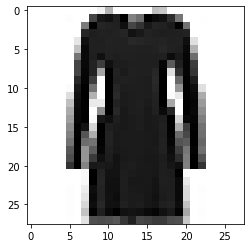

'label: 드레스 / prediction: 셔츠 (83.513%)'

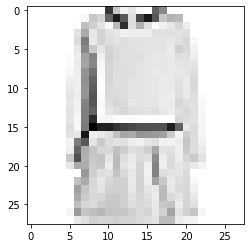

'label: 셔츠 / prediction: 셔츠 (99.985%)'

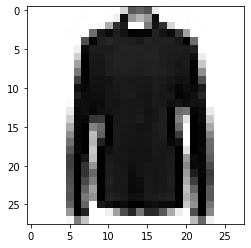

'label: 샌들 / prediction: 샌들 (99.998%)'

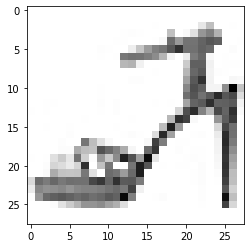

'label: 바지 / prediction: 바지 (99.996%)'

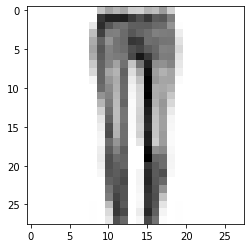

'label: 가방 / prediction: 가방 (99.994%)'

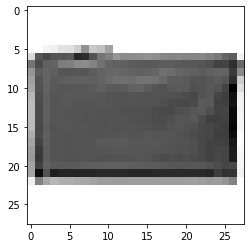

'label: 코트 / prediction: 코트 (99.729%)'

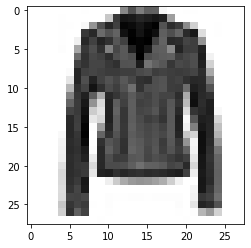

'label: 샌들 / prediction: 샌들 (99.985%)'

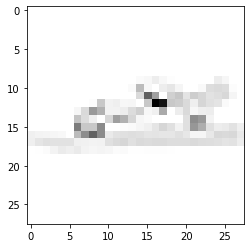

'label: 티셔츠/상의 / prediction: 티셔츠/상의 (99.928%)'

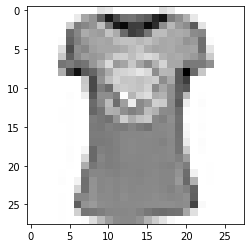

'label: 티셔츠/상의 / prediction: 티셔츠/상의 (99.963%)'

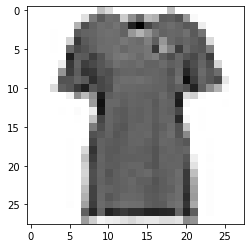

'label: 운동화 / prediction: 운동화 (99.995%)'

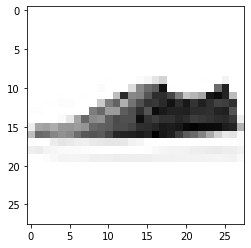

'label: 스웨터 / prediction: 스웨터 (99.950%)'

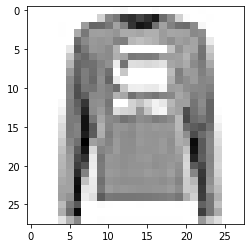

'label: 코트 / prediction: 코트 (100.000%)'

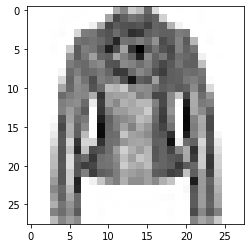

'label: 스웨터 / prediction: 스웨터 (96.272%)'

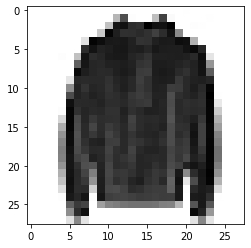

'label: 운동화 / prediction: 운동화 (99.983%)'

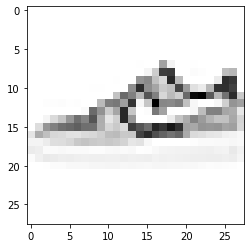

'label: 바지 / prediction: 바지 (99.979%)'

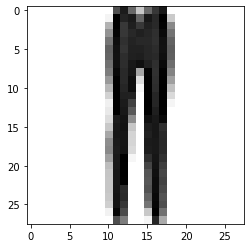

'label: 샌들 / prediction: 샌들 (99.613%)'

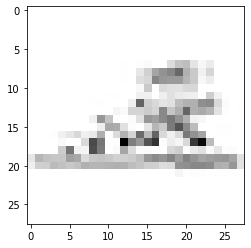

'label: 코트 / prediction: 코트 (54.903%)'

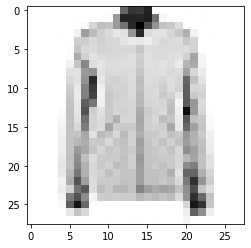

'label: 운동화 / prediction: 운동화 (97.953%)'

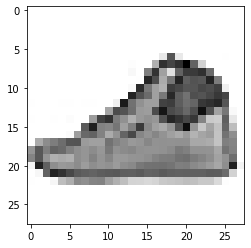

'label: 샌들 / prediction: 샌들 (99.982%)'

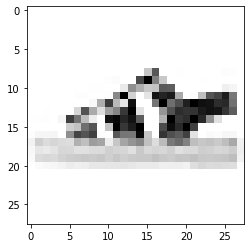

'label: 드레스 / prediction: 드레스 (100.000%)'

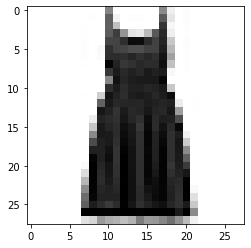

'label: 바지 / prediction: 바지 (99.999%)'

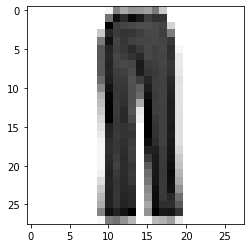

'label: 가방 / prediction: 가방 (100.000%)'

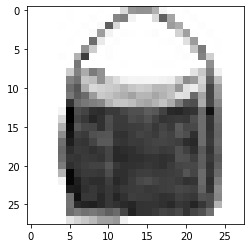

'label: 부츠 / prediction: 부츠 (99.999%)'

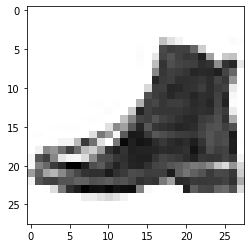

'label: 부츠 / prediction: 부츠 (82.597%)'

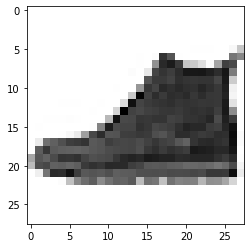

'label: 셔츠 / prediction: 셔츠 (54.325%)'

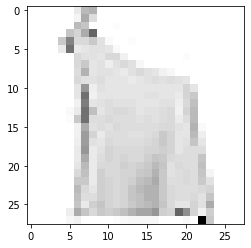

'label: 스웨터 / prediction: 스웨터 (74.111%)'

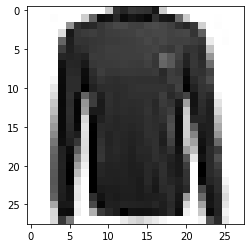

'label: 바지 / prediction: 바지 (99.998%)'

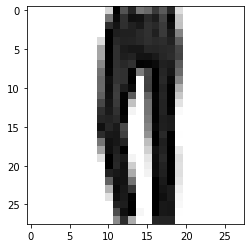

'label: 티셔츠/상의 / prediction: 드레스 (67.194%)'

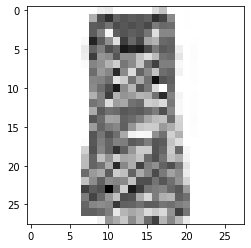

'label: 부츠 / prediction: 부츠 (99.898%)'

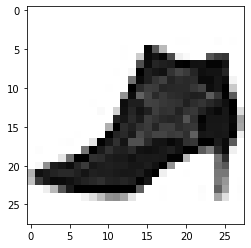

'label: 부츠 / prediction: 부츠 (56.517%)'

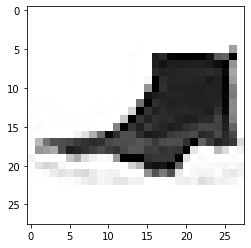

'label: 티셔츠/상의 / prediction: 티셔츠/상의 (77.340%)'

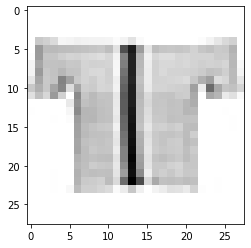

'label: 드레스 / prediction: 드레스 (99.995%)'

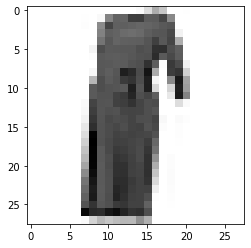

'label: 샌들 / prediction: 샌들 (99.994%)'

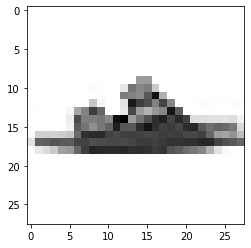

'label: 가방 / prediction: 가방 (99.981%)'

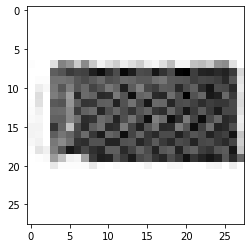

'label: 운동화 / prediction: 운동화 (99.892%)'

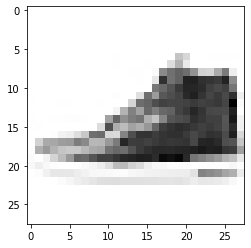

'label: 스웨터 / prediction: 스웨터 (99.971%)'

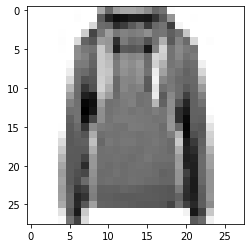

'label: 코트 / prediction: 코트 (99.999%)'

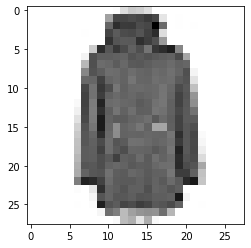

'label: 가방 / prediction: 가방 (99.997%)'

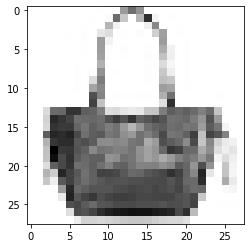

'label: 코트 / prediction: 코트 (100.000%)'

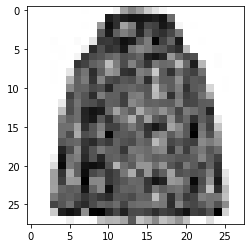

'label: 가방 / prediction: 가방 (96.734%)'

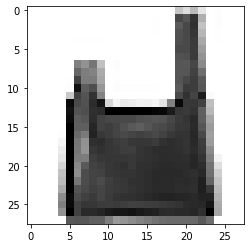

'label: 샌들 / prediction: 샌들 (99.069%)'

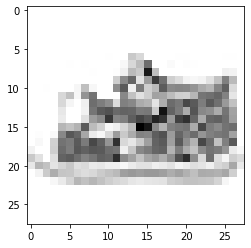

'label: 코트 / prediction: 코트 (99.928%)'

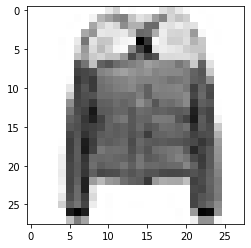

'label: 스웨터 / prediction: 스웨터 (100.000%)'

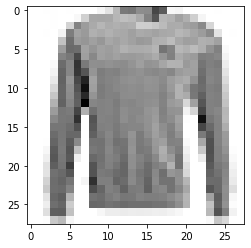

'label: 가방 / prediction: 가방 (99.998%)'

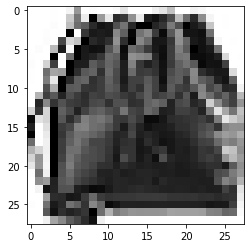

'label: 스웨터 / prediction: 스웨터 (100.000%)'

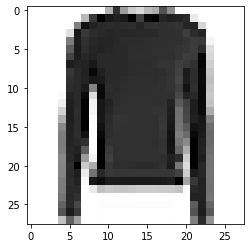

'label: 가방 / prediction: 가방 (99.999%)'

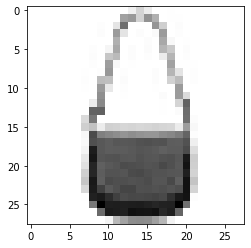

'label: 티셔츠/상의 / prediction: 티셔츠/상의 (99.982%)'

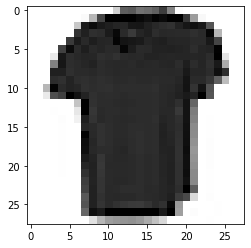

'label: 셔츠 / prediction: 셔츠 (98.206%)'

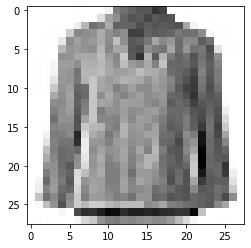

'label: 운동화 / prediction: 운동화 (99.972%)'

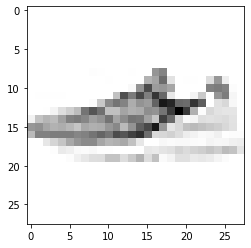

In [8]:
with torch.no_grad():
  model.eval()
  
  for x, y in itertools.islice(DataLoader(fashion_mnist_test_dataset, batch_size=1, shuffle=True), 50):
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.to(device)
    y = y.to(device)

    hypothesis = model(x)
    prediction = torch.argmax(hypothesis, dim=1).item()
    prediction_percent = torch.softmax(hypothesis, dim=1).max(dim=1)[0].item() * 100

    display("label: {} / prediction: {} ({:.3f}%)".format(label_map[y.item()], label_map[prediction], prediction_percent))
    plt.imshow(x.cpu().view(28, 28), cmap=plt.cm.Greys, interpolation="nearest")
    plt.show()